In [2]:
%load_ext autoreload
%autoreload 2

from scripts.cross_coupler import enumerate_bonds_between_templates
from scripts.util import render_enumeration

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


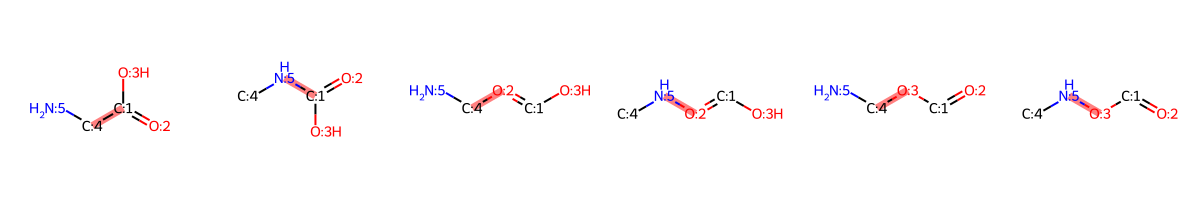

In [88]:
from rdkit import Chem

temp1 = Chem.MolFromSmarts("[C;H0;+0:1](=[O;H0;+0:2])-[O;H0;+0:3]")
temp2 = Chem.MolFromSmarts("[C;H2;+0:4]-[N;H2;+0:5]")
mol1, mol2, products, hit_bonds = enumerate_bonds_between_templates(temp1,temp2)
render_enumeration(products, hit_bonds=hit_bonds, numMolsPerRow=6)


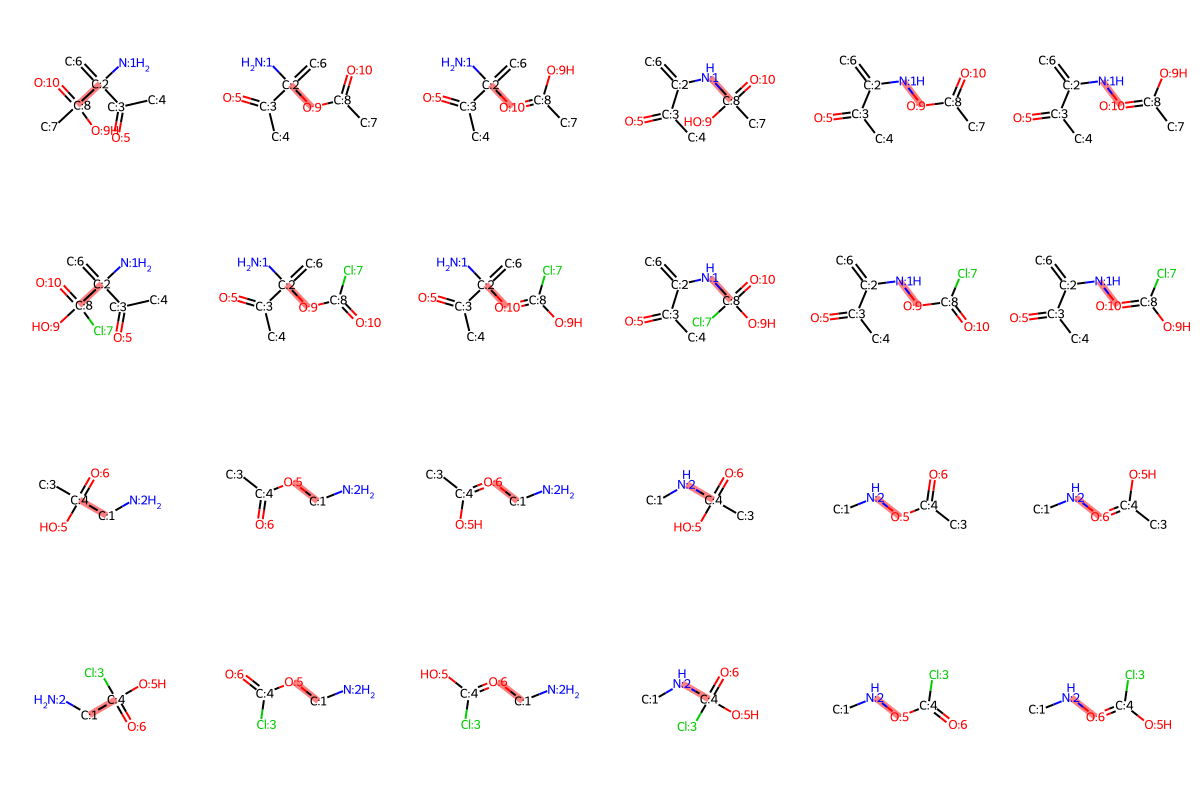

In [96]:
from scripts.cross_coupler import combinate

amines = ["NC(C(C)=O)=C", "CN"]
acids = ["CC(O)=O", "ClC(O)=O"]
mol1, mol2, products, hit_bonds = combinate(amines,acids)

render_enumeration(products, hit_bonds=hit_bonds, numMolsPerRow=6)


chlorides = ["ClC(C=C)CCC(C)C", "CC(CCCCl)C"]



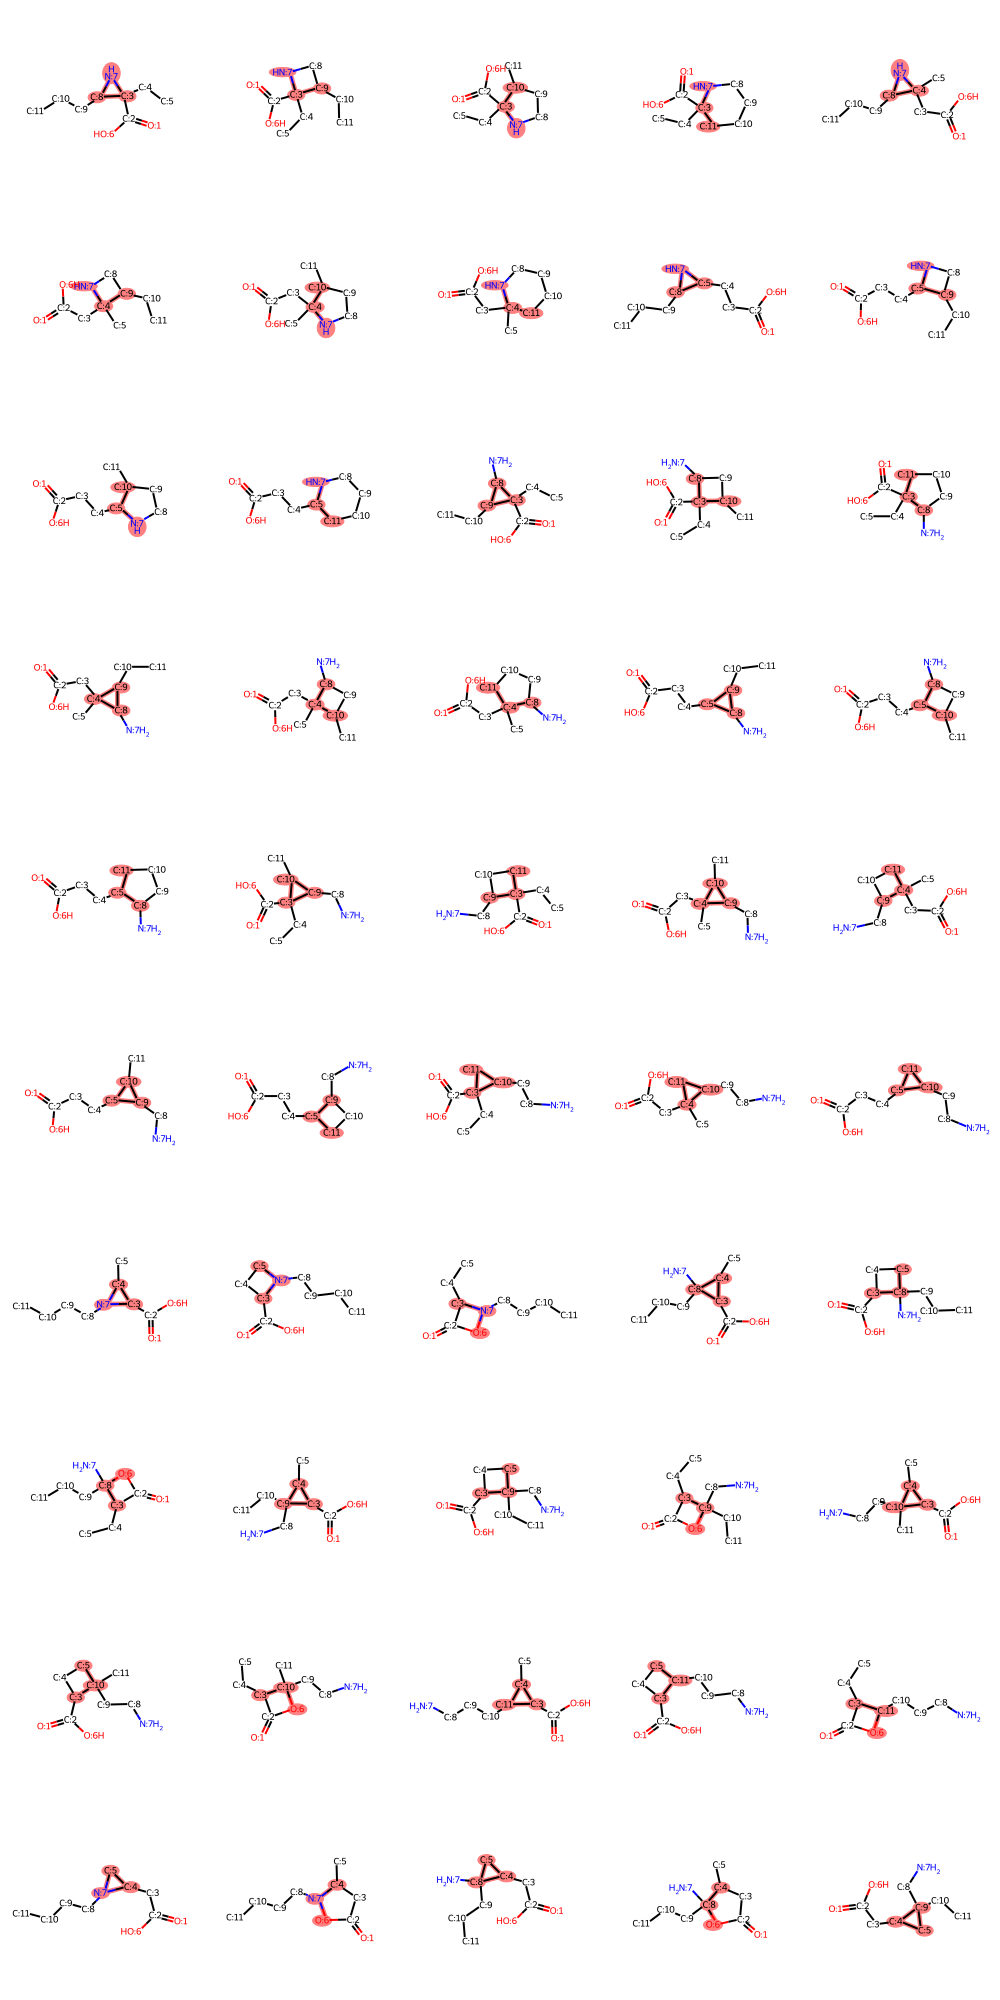

In [149]:
from scripts.fusions import fusionCoupling

set2 = ["NCCCC"]
set1 = ["O=C(CCC)O"]

enum_products, ats = fusionCoupling(set1, set2)

render_enumeration(enum_products, hit_atoms=ats)

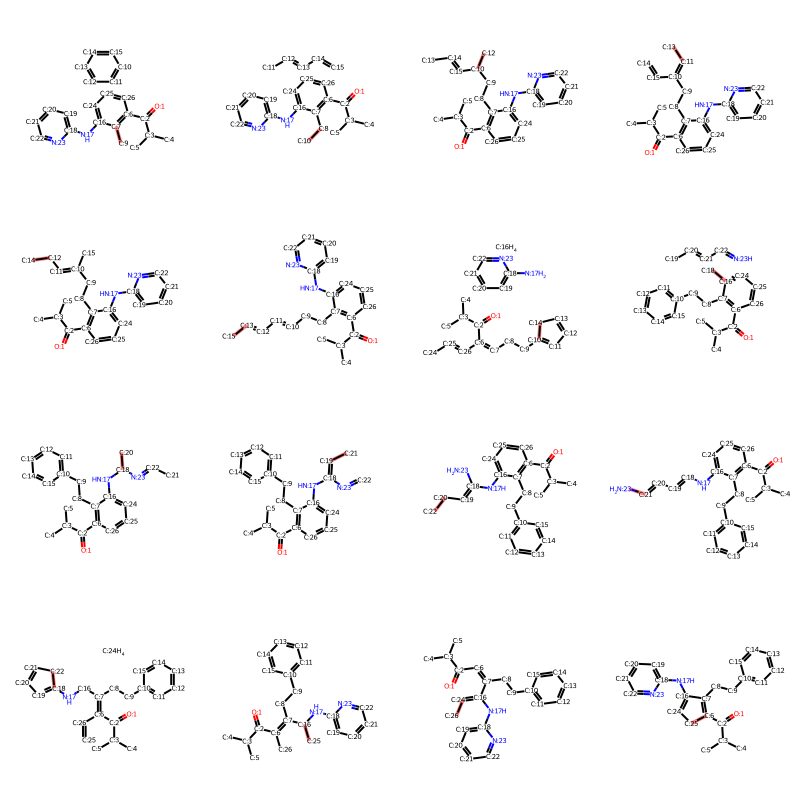

In [165]:
from scripts.deletions import deleteAtom

mol = Chem.MolFromSmiles("O=C(C(C)C)C1=C(CCC2=CC=CC=C2)C(NC3=CC=CC=N3)=CC=C1")
new_molecules, mapped_mol, bond_counter, removed = deleteAtom(mol)

render_enumeration(new_molecules, hit_bonds=removed, numMolsPerRow=4)


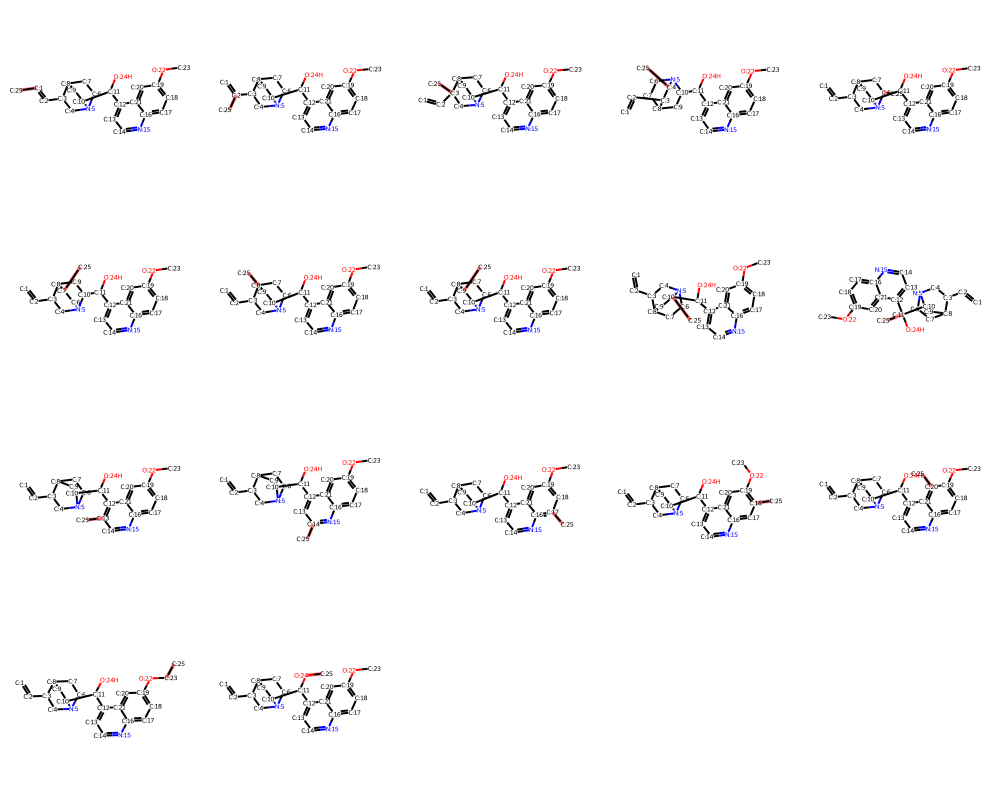

In [180]:
from scripts.atom_walking import atom_walk

mol = Chem.MolFromSmiles("C=C[C@H]1C[N@@]2CC[C@H]1C[C@H]2[C@@H](C3=CC=NC4=CC=C(C=C34)OC)O")
mols, new_bonds = atom_walk(mol, "C")

render_enumeration(mols, new_bonds, numMolsPerRow=5)

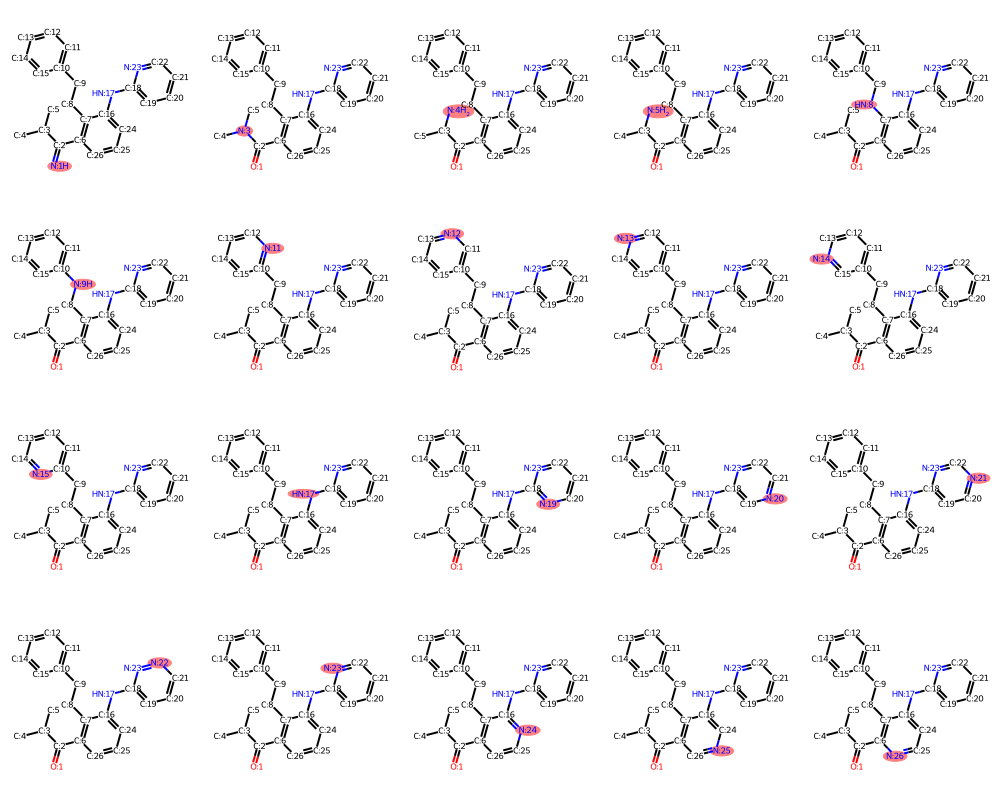

In [188]:
from scripts.atom_walking import atom_swap

mol = Chem.MolFromSmiles("O=C(C(C)C)C1=C(CCC2=CC=CC=C2)C(NC3=CC=CC=N3)=CC=C1")
mols, new_bonds = atom_swap(mol, "N")

render_enumeration(mols, hit_atoms=new_bonds)

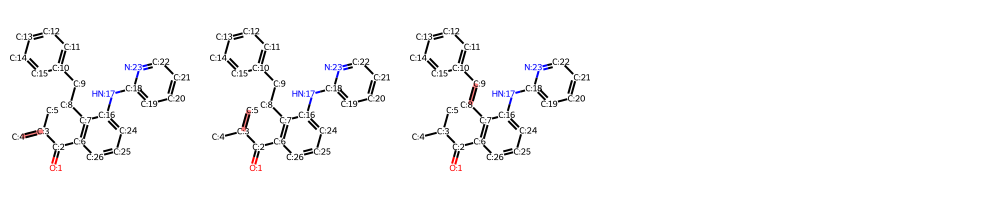

In [207]:
from scripts.atom_walking import bond_order_enumerator

mol = Chem.MolFromSmiles("O=C(C(C)C)C1=C(CCC2=CC=CC=C2)C(NC3=CC=CC=N3)=CC=C1")
mols, new_bonds = bond_order_enumerator(
    mol, initial_bond_order="single", target_bond_order="double"
)

render_enumeration(mols, hit_bonds=new_bonds)

[19:14:31] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 2 


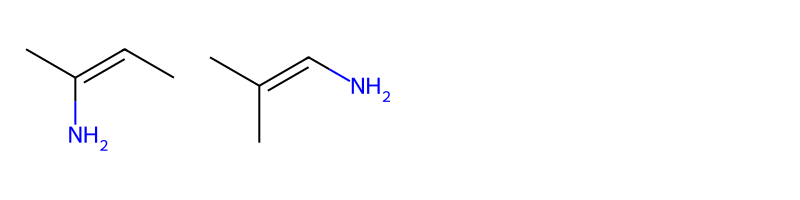

In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
rxn_hi = AllChem.ReactionFromSmarts("[*:1][Cl,Br,I:2].[C:3]=[C:4]>>[*:1][C:3]=[C:4]")

mol1 = Chem.MolFromSmiles("CCl")
mol2 = Chem.MolFromSmiles("NC=CC")

ps = rxn_hi.RunReactants((mol1, mol2))
mols = []
for p in ps:
    for pp in p:
        mols.append(pp)

Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200))